In [55]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [56]:
torch.manual_seed(0) ##多次运行代码，每次生成的随机数相同
np.random.seed(0)

In [ ]:
## numpy数组与tensor的转换
a=np.array([1,2,3,4])
print(a.shape)
a=torch.from_numpy(a)
print(a.shape)

(100, 1)


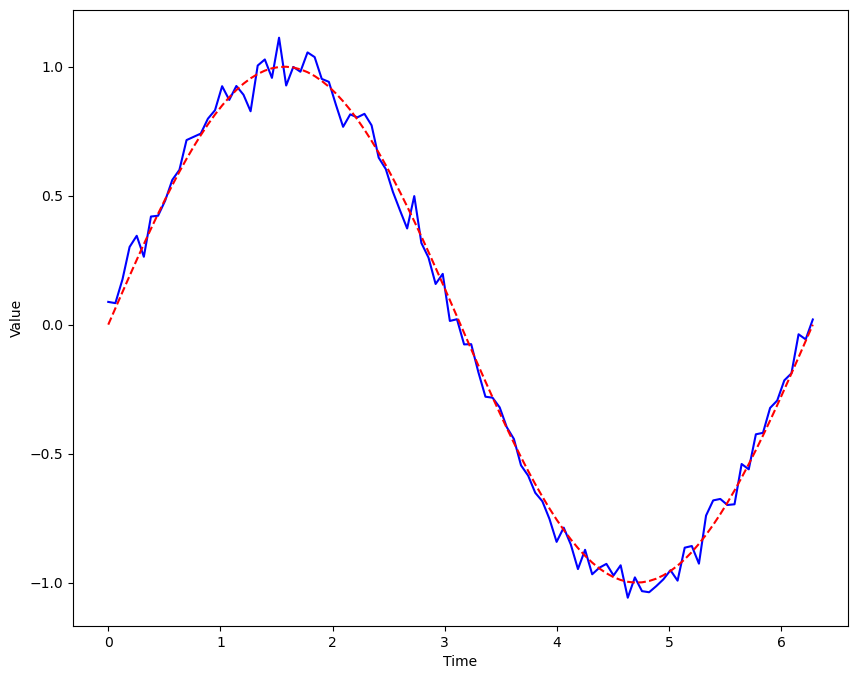

In [57]:
time_steps=np.linspace(0,torch.pi*2,100,dtype=np.float32)
data=np.sin(time_steps)
data=data.reshape(-1,1)
print(data.shape)
noise=np.random.normal(0,0.05,size=data.shape) ##添加噪声
data_noise=data+noise
plt.figure(figsize=(10,8))
plt.plot(time_steps,data_noise,color='b')
plt.plot(time_steps,data,linestyle='--',color='r')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [58]:
##定义序列长度
seq_length=10
def create_out_sequence(input_data,seq_length):
    out_seq=[]
    L=len(input_data)
    for i in range(L-seq_length):
        train_seq=input_data[i:i+seq_length]
        train_label=input_data[i+seq_length]
        out_seq.append((train_seq,train_label))
    return out_seq

In [87]:
inout_seq = create_out_sequence(data, seq_length)
input_seq=torch.FloatTensor([seq[0] for seq in inout_seq]).to('cuda:0')
target=torch.FloatTensor([seq[1] for seq in inout_seq]).to('cuda:0')

print(input_seq.shape)
print(target.shape)

# input_seq=train_out_seq[:,0]
# target=train_out_seq[:,1]


torch.Size([90, 10, 1])
torch.Size([90, 1])


In [81]:
a=np.array([[1,2,3],
           [4,5,6]])
print(a[:,1])

[2 5]


In [88]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_layers=1):
        super(RNN,self).__init__()
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        ##定义LSTM层
        self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        ##初始化隐藏状态和细胞
        h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to('cuda:0')
        c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to('cuda:0')
        out,(hn,cn)=self.lstm(x,(h0,c0))
        out=out[:,-1,:]
        out=self.fc(out)
        return out
        

In [99]:
input_size=1
hidden_size=5
output_size=1
num_layers=1
learning_rate=0.01
epochs=100
model=RNN(input_size,hidden_size,output_size,num_layers).to('cuda:0')
loss_fn=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [100]:
model.train()
for epoch in range(epochs):
    # inputs=input_seq.unsqueeze(-1)
    labels=target
    labels=labels
    ##前向传播
    outputs=model(input_seq)
    loss=loss_fn(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%10==0:
        print(f"Epoch:[{epoch+1}/{epochs}],Loss:{loss.item():.4f}")

Epoch:[1/100],Loss:0.6471
Epoch:[11/100],Loss:0.3432
Epoch:[21/100],Loss:0.0880
Epoch:[31/100],Loss:0.0600
Epoch:[41/100],Loss:0.0304
Epoch:[51/100],Loss:0.0244
Epoch:[61/100],Loss:0.0138
Epoch:[71/100],Loss:0.0081
Epoch:[81/100],Loss:0.0053
Epoch:[91/100],Loss:0.0035


In [103]:
model.eval()
test_data=data
test_seq=test_data[:seq_length]
print(test_seq.shape)
predictions=[]
##开始预测

for i in range(len(test_data)-seq_length):

    pred=model(input_seq)
    predictions.append(pred.detach().numpy()[0,0])
    test_seq=np.append(test_seq[1:],pred.detach().numpy()[0,0])
predictions=np.array(predictions)

plt.figure(figsize=(10,8))
plt.plot(time_steps[seq_length:],predictions,color='b')
plt.xlabel('Time')
plt.ylabel('Prediction')
plt.show()

(10, 1)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [107]:
print(data.shape)
print(data[:-1].shape)  ##左闭右开


(100, 1)
(99, 1)


In [37]:
out=torch.randn(2,5)
out=out.unsqueeze(-1)
print(out,out.shape)
##out.shape的维度是[batch_size,steps,feature]

tensor([[[-2.0125],
         [-0.8756],
         [ 1.0961],
         [ 0.6274],
         [-0.3454]],

        [[ 1.1702],
         [ 0.6656],
         [ 2.2882],
         [ 0.0620],
         [-0.5819]]]) torch.Size([2, 5, 1])
